In [145]:
%matplotlib inline

In [146]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-pastel')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.stats import boxcox

In [147]:
# importing the dataset
df = pd.read_csv('/Users/manju/Downloads/spotify_songs.csv')

# Display the first few rows of the dataset to get an overview of its structure
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [148]:
# Displaying the count number of distinct elements
df.nunique()

track_id                    28356
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
dtype: int64

In [149]:
# Generate descriptive statistics summarizing the numerical features in the dataset
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [150]:
# Displaying dataset assessment
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [151]:
# Checking for missing values
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [152]:
# Droppong the missing values 5 each in track_name, track_artist, track_album_name
df.dropna(inplace=True)

In [153]:
# Checking for missing values
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [154]:
# Checking for duplicate rows
df.duplicated().sum()

0

In [155]:
# Repeating Track ID
display(df['track_id'].value_counts()[df['track_id'].value_counts()>1])
display(df['track_id'].value_counts()[df['track_id'].value_counts()>1].sum())

track_id
7BKLCZ1jbUBVqRi2FVlTVw    10
14sOS5L36385FJ3OL8hew4     9
3eekarcy7kvN4yt5ZFzltW     9
0sf12qNH5qcw8qpgymFOqD     8
7h0d2h0fUmzbs7zeFigJPn     8
                          ..
1louJpMmzEicAn7lzDalPW     2
2GdxQw8NwoeH8tKySg6nym     2
1EJgymgJHcjSOGSHcYaxvW     2
5scxjvcdozadBoRRN0UMaM     2
3iJeF2izF1QcpCgUc97BLl     2
Name: count, Length: 3165, dtype: int64

7641

In [156]:
# Same song is in multiple playlists
# Total of 7641 track id are repeating
df[df['track_id'] == '7h0d2h0fUmzbs7zeFigJPn'] #different playlists have the same track (only once in each)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
5540,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
9021,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,GTA San Andreas Radio Los Santos,6m0BqpJfSP2m5xCOFjDRHw,rap,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
11182,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,Trap Americana,7tkgK1tm9hYkWp7EFyOcAr,rap,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
18310,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
19718,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
21361,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,New Hip Hop‏‏​​ ‍,5WNUX6jisX0NRlVDTm6RDd,r&b,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
23163,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
30268,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874


In [157]:
#Converting 'track_album_release_date' column to datetime object type
# Convert the 'track_album_release_date' to a datetime object in the original dataframe
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Display the converted column to verify the changes
df[['track_album_release_date']].head()

,track_album_release_date
0,2019-06-14
1,2019-12-13
2,2019-07-05
3,2019-07-19
4,2019-03-05


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  32828 non-null  object        
 1   track_name                32828 non-null  object        
 2   track_artist              32828 non-null  object        
 3   track_popularity          32828 non-null  int64         
 4   track_album_id            32828 non-null  object        
 5   track_album_name          32828 non-null  object        
 6   track_album_release_date  30942 non-null  datetime64[ns]
 7   playlist_name             32828 non-null  object        
 8   playlist_id               32828 non-null  object        
 9   playlist_genre            32828 non-null  object        
 10  playlist_subgenre         32828 non-null  object        
 11  danceability              32828 non-null  float64       
 12  energy                 

In [159]:
#Null Values check for track_album_release_date column after datatype conversion
missing_date = df['track_album_release_date'].isna() | (df['track_album_release_date'] == '')
print(missing_date.sum())

1886


In [160]:
#Data set has only year for few of the records approximately 1886 records. They are coming as null
null_rows = df[df['track_album_release_date'].isnull()]
display(null_rows)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
151,2QtJA4gbwe1AcanB2p21aP,Stay The Night - Featuring Hayley Williams Of ...,Zedd,61,4xak0izXQHOMV9Wu1mDAAy,Clarity (Deluxe),NaT,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,8,-3.109,1,0.0411,0.10900,0.000000,0.0947,0.461,127.961,217347
749,77j9HOrxUpWcjwra9jgvio,We like to Party! (Six Flags),Vengaboys,51,0R44mmTKUE1XCuGVVrPfTZ,We like to Party! (The Vengabus),NaT,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,8,-7.929,1,0.0449,0.00803,0.859000,0.0460,0.969,136.018,224227
750,6rQ9qJPvInEqSzlh89LsPJ,Coco Jamboo - Radio Version,Mr. President,18,2t8Bc4qBseswbwOoHGHK8d,We See The Same Sun,NaT,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,1,-5.414,0,0.0421,0.07910,0.000000,0.1520,0.965,100.019,218733
751,5FgtdSf7I5lClThz2ptWvl,Blue (Da Ba Dee),Eiffel 65,16,65DySolRDG1LNSvRXcWQWN,Europop,NaT,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,7,-11.471,0,0.0582,0.25900,0.000162,0.3900,0.765,128.007,283748
753,2ahnofp2LbBWDXcJbMaSTu,What Is Love,Haddaway,70,0qTVjeVP70YvQG4GctetOf,What is Love - Remix,NaT,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,7,-7.907,0,0.0311,0.02220,0.014900,0.2030,0.737,123.871,270373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32360,0363w3IUcO4cJMsAFLpfLY,Faith - Radio Edit,Blasterjaxx,0,1IZUFYTXNbjkzgawT7cFpM,Faith,NaT,Gym (Melbourne Bounce/Progressive House),5BqOZpVEqRDfZScvW1QUyA,edm,...,9,-6.566,0,0.0486,0.00636,0.002310,0.1870,0.670,128.009,183067
32767,1h7LBCgfnSUEe7qXRbwMIp,Push Play,Zedd,39,4xak0izXQHOMV9Wu1mDAAy,Clarity (Deluxe),NaT,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,9,-1.440,1,0.0459,0.08680,0.000000,0.0841,0.252,130.030,219360
32774,1NtVWYw9QDr30Ei0phACni,Lessons In Love (feat. Neon Trees),Kaskade,23,7r47EiktL01BmvI7NHdgcA,Fire & Ice,NaT,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,7,-4.335,1,0.0540,0.02650,0.000013,0.1330,0.597,127.989,247693
32775,454ZIylnCq09ONjQE4EJ6a,Turn It Down (with Rebecca & Fiona) - Radio Edit,Kaskade,13,0xiigD6kCGMSv9CcSpJFUr,"I Love You, Man (Bonus Track Version)",NaT,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-7.922,0,0.0455,0.05360,0.008350,0.3390,0.413,126.971,238360


In [161]:
# Replace empty strings with NaT
df['track_album_release_date'].replace('', pd.NaT, inplace=True)

# Drop rows where 'track_album_release_date' is NaT
df = df.dropna(subset=['track_album_release_date'])

# Check if the rows were removed
print(df['track_album_release_date'].isna().sum())

0


In [162]:
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [163]:
# Checking if each repeated track ID have same features such as duration, popularity, loudeness
df[df['track_id'].duplicated()].sort_values(by='track_id')
# yes, the other properties are same for duplicated track id

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32084,00Gu3RMpDW2vO9PjlMVFDL,Hide Away (feat. Envy Monroe),Blasterjaxx,42,5pqG85igfoeWcCDIsSi9x7,Hide Away (feat. Envy Monroe),2019-06-21,Epic Bass Drops | Best House Mixes,4IS7o1utOzhimFEFnj9gmu,edm,...,10,-4.894,1,0.0421,0.02490,0.000000,0.3610,0.134,130.001,188000
23850,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,59,1jg2UPoSAr7CDPsEXcabo1,Fast & Furious 6,2013-01-01,Today's Hits (Clean),7ENISpOJhocpMJVcGb0qcT,r&b,...,8,-4.573,1,0.4080,0.05210,0.000000,0.0568,0.552,171.966,227893
28968,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,59,1jg2UPoSAr7CDPsEXcabo1,Fast & Furious 6,2013-01-01,Locker Room,37i9dQZF1DX8SaiEt4OVJw,edm,...,8,-4.573,1,0.4080,0.05210,0.000000,0.0568,0.552,171.966,227893
9345,00ReeHCY0FQUyuAUyPJdnk,Ain't No Future In Yo' Frontin',MC Breed,48,7mLks5uEIPmT0056mb5oV3,MC Breed & DFC,1991-01-01,90's Gangster Rap,1g3APxk2mLVNU2TuHCPli0,rap,...,0,-9.644,1,0.2480,0.05140,0.000000,0.4740,0.731,102.192,244733
14626,00WIXhVVhswHuS6dlkScuw,Hot,Confetti,51,6nsXqX8wZbkiqSKmSqxsuT,Hot,2019-11-22,Modern Indie Rock // Alternative Rock / Garage...,1VnvyBDqoV5TCZAnXYferL,rock,...,7,-3.883,1,0.1070,0.00297,0.000002,0.1200,0.664,168.015,150714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26407,7zBkFHiWejDPxIimU8XpVw,All over You,LEISURE,2,1SZzXX9j7MdYNkvWadCr4i,Leisure,2016-10-21,Neo-Jazz Soul RnB & Afro,48AzM7l4M02DBYd2N3IFLP,r&b,...,2,-8.826,1,0.0518,0.16200,0.005520,0.0920,0.867,70.007,234925
25577,7zFXmv6vqI4qOt4yGf3jYZ,Get You (feat. Kali Uchis),Daniel Caesar,78,3xybjP7r2VsWzwvDQipdM0,Freudian,2017-08-25,NEO-soul,3q3M4VCymcMoxJ3Tl7mRqN,r&b,...,4,-8.533,0,0.0321,0.42200,0.000052,0.0749,0.358,74.038,278180
32074,7zHrHnVSQwI95FGHewXDl8,Do Bad Well (feat. Nevve),KSHMR,62,3BAigRfKg2iyWJuWlZCZZQ,Do Bad Well (feat. Nevve),2019-10-11,Epic Bass Drops | Best House Mixes,4IS7o1utOzhimFEFnj9gmu,edm,...,5,-4.755,1,0.1130,0.05120,0.000315,0.2340,0.415,127.964,204375
30939,7zsXy7vlHdItvUSH8EwQss,Cold Water,Major Lazer,69,3Kmo85mapQ2wTaCAHBkKsK,Cold Water,2016-07-22,EDM/POP,6gHk5RFrnALbDNJdaXKivi,edm,...,6,-5.092,0,0.0432,0.07360,0.000000,0.1560,0.501,92.943,185360


In [164]:
# Check the skewness of all numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate skewness for these features
print(df[numerical_features].skew())

track_popularity   -0.233573
danceability       -0.513590
energy             -0.637447
key                -0.019212
loudness           -1.409080
mode               -0.245655
speechiness         1.944476
acousticness        1.594463
instrumentalness    2.709762
liveness            2.095760
valence             0.013584
tempo               0.525084
duration_ms         1.169463
dtype: float64


# HANDLING SKEWNESS

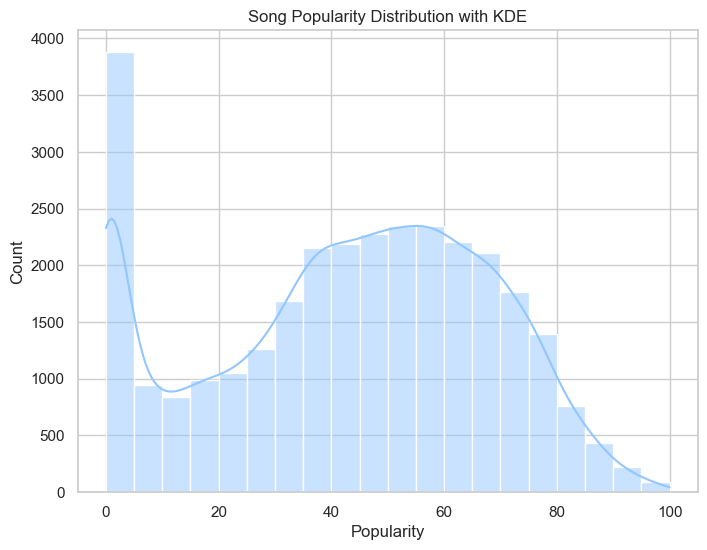

In [165]:
# song popularity histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['track_popularity'], bins=20, kde=True)

# Add title and labels
plt.title('Song Popularity Distribution with KDE')
plt.xlabel('Popularity')

# Show the plot
plt.show()

In [143]:
def analyze_popularity_distribution(df):
    """
    Analyze the distribution of track popularity and suggest sampling strategies
    """
    # Calculate skewness
    skewness = df['track_popularity'].skew()
    
    # Create distribution plot
    plt.figure(figsize=(12, 6))
    
    # Histogram with KDE
    sns.histplot(data=df, x='track_popularity', kde=True)
    plt.title(f'Distribution of Track Popularity (Skewness: {skewness:.2f})')
    plt.xlabel('Track Popularity')
    plt.ylabel('Count')
    plt.show()
    
    # Calculate some statistical measures
    stats_dict = {
        'mean': df['track_popularity'].mean(),
        'median': df['track_popularity'].median(),
        'std': df['track_popularity'].std(),
        'skewness': skewness,
        'kurtosis': df['track_popularity'].kurtosis()
    }
    
    # Create popularity bins
    df['popularity_bin'] = pd.qcut(df['track_popularity'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    
    # Calculate bin distributions
    bin_distribution = df['popularity_bin'].value_counts().sort_index()
    
    return stats_dict, bin_distribution

def suggest_sampling_strategy(bin_distribution, total_desired_samples=None):
    """
    Suggest sampling strategy based on popularity distribution
    """
    if total_desired_samples is None:
        #total_desired_samples = len(bin_distribution) * 1400  # sample size can increase/decrease
        total_desired_samples = len(bin_distribution) * 2000  
    
    # Calculate target samples per bin for more balanced distribution
    target_samples = total_desired_samples // len(bin_distribution)
    
    sampling_strategy = {}
    for bin_name, count in bin_distribution.items():
        if count > target_samples:
            sampling_strategy[bin_name] = ('downsample', target_samples)
        else:
            sampling_strategy[bin_name] = ('upsample', target_samples)
    
    return sampling_strategy

def apply_sampling_strategy(df, sampling_strategy):
    """
    Apply the suggested sampling strategy to create a more balanced dataset
    """
    sampled_dfs = []
    
    for bin_name, (strategy, target_count) in sampling_strategy.items():
        bin_df = df[df['popularity_bin'] == bin_name]
        
        if strategy == 'downsample':
            sampled_df = bin_df.sample(n=target_count, random_state=42)
        else:  # upsample
            sampled_df = bin_df.sample(n=target_count, replace=True, random_state=42)
        
        sampled_dfs.append(sampled_df)
    
    return pd.concat(sampled_dfs, ignore_index=True)

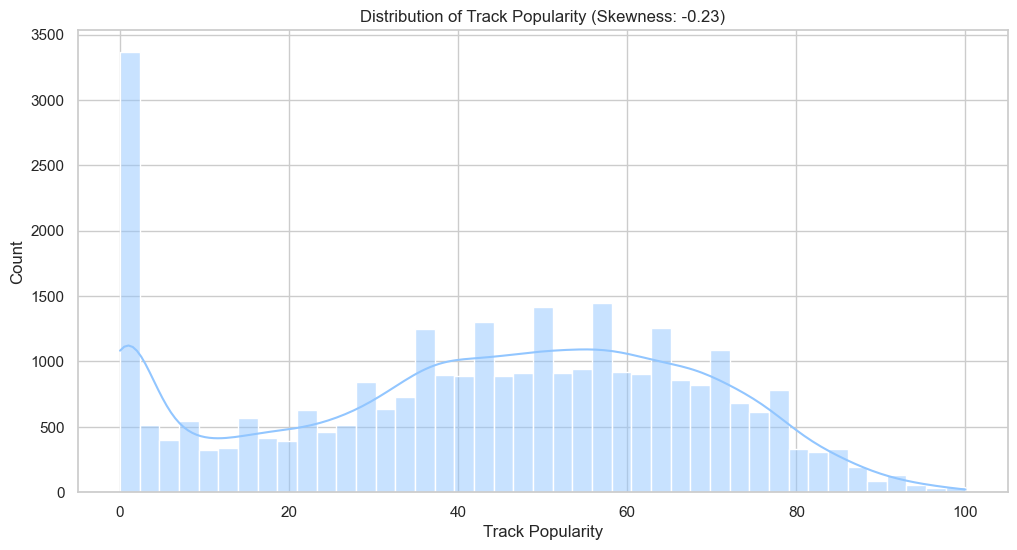


Original Distribution Statistics:
mean: 42.76
median: 45.00
std: 24.95
skewness: -0.23
kurtosis: -0.91

Bin Distribution:
popularity_bin
Very Low     6241
Low          6565
Medium       5885
High         6321
Very High    5930
Name: count, dtype: int64

Suggested Sampling Strategy:
Very Low: Downsample to 2000 samples
Low: Downsample to 2000 samples
Medium: Downsample to 2000 samples
High: Downsample to 2000 samples
Very High: Downsample to 2000 samples

After Sampling:


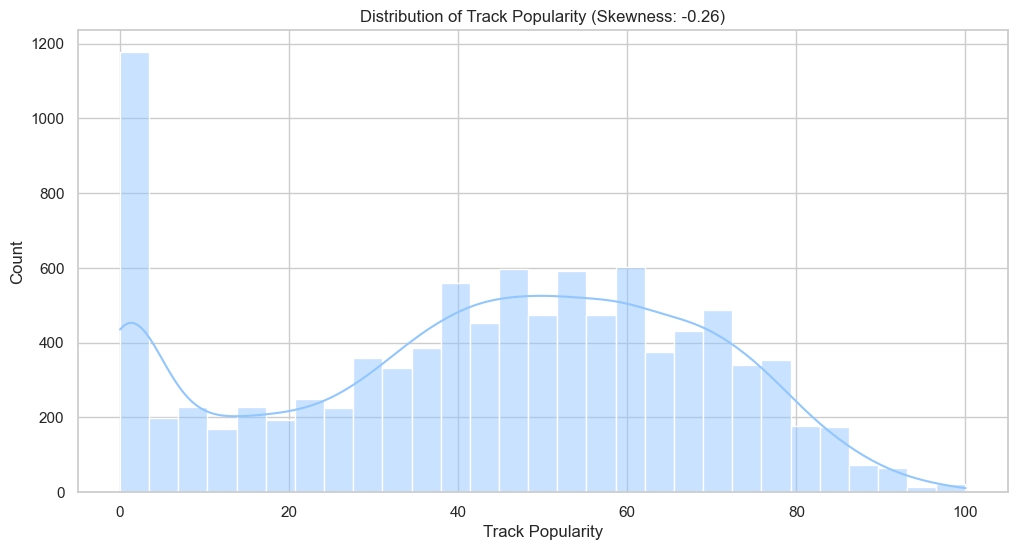

In [144]:
# Analyze original distribution
stats_dict, bin_distribution = analyze_popularity_distribution(df)
    
print("\nOriginal Distribution Statistics:")
for stat_name, value in stats_dict.items():
    print(f"{stat_name}: {value:.2f}")
    
print("\nBin Distribution:")
print(bin_distribution)
    
# Get sampling strategy
sampling_strategy = suggest_sampling_strategy(bin_distribution)
    
print("\nSuggested Sampling Strategy:")
for bin_name, (strategy, target_count) in sampling_strategy.items():
    print(f"{bin_name}: {strategy.title()} to {target_count} samples")
    
# Apply sampling strategy
balanced_df = apply_sampling_strategy(df, sampling_strategy)
    
# Show new distribution
print("\nAfter Sampling:")
_, new_bin_distribution = analyze_popularity_distribution(balanced_df)

In [96]:
balanced_df.shape

(12500, 24)

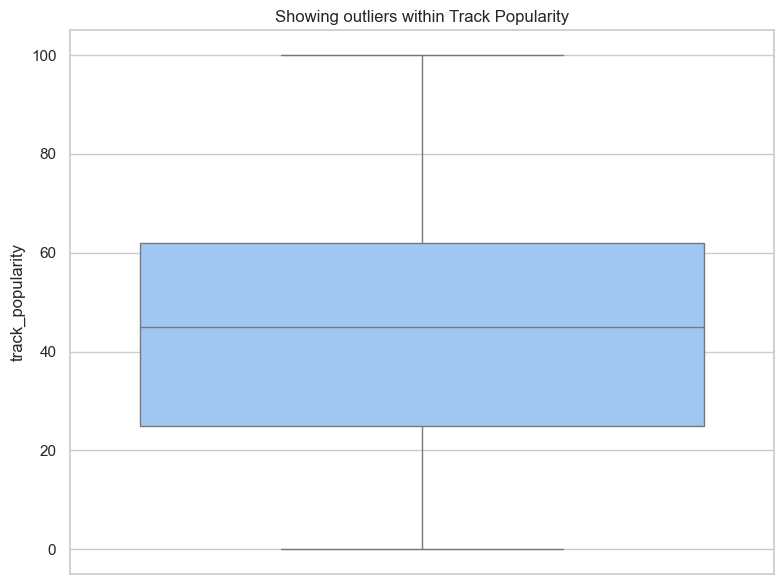

In [97]:
# track_popularity is left skewed (-0.233485)
# checking for outliners
# Plot Demand outliers
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df, y='track_popularity', ax=ax)
ax.set_title('Showing outliers within Track Popularity')
plt.tight_layout()
plt.show()
# No outliers

# Feature Engineering

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
# Droping columns that do not impact the track_popularity calcuation
spotify_data_cleaned = balanced_df.drop(columns=[
    #'track_id', 'track_name', 
    'track_artist', 'track_album_id', 
    'track_album_name', 'track_album_release_date', 'playlist_name', 
    'playlist_id', 'playlist_genre','playlist_subgenre'
])

In [100]:
# Selecting only numeric columns for correlation analysis
numeric_data = spotify_data_cleaned.select_dtypes(include=[np.number])

# Calculating correlation with 'track_popularity'
correlations = numeric_data.corr()['track_popularity'].sort_values(ascending=False)

# Displaying the correlations
print("Correlation with Track Popularity:\n", correlations)

Correlation with Track Popularity:
 track_popularity    1.000000
acousticness        0.083426
danceability        0.061574
loudness            0.046764
valence             0.032405
mode                0.016606
speechiness         0.014308
key                -0.002547
tempo              -0.014163
liveness           -0.057366
energy             -0.125920
duration_ms        -0.138662
instrumentalness   -0.156778
Name: track_popularity, dtype: float64


In [101]:
spotify_data_cleaned.head()

,track_id,track_name,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity_bin
0,0utR47mwVxzobWJqPIgEl2,Fade Into Darkness - Vocal Radio Mix,9,0.556,0.885,6,-4.045,1,0.0321,0.00786,0.000002,0.1380,0.771,125.997,198133,Very Low
1,3ljSgbje1smfadZ2vdeQF2,Akap,0,0.221,0.473,9,-8.497,1,0.0301,0.39900,0.000003,0.1200,0.176,78.743,336640,Very Low
2,05YVJezG8p4RtNir63600R,Bust Dem - Original Mix,0,0.604,0.966,7,-2.378,1,0.0730,0.00150,0.331000,0.1100,0.234,127.981,204492,Very Low
3,32Te40UQyEMvCrVlw19d7q,Twilight Solitude,0,0.568,0.132,4,-18.152,1,0.0368,0.98600,0.899000,0.0725,0.141,119.573,264227,Very Low
4,4bYJKHG6KLdGzHQRJMaFc8,Rock And Roll All Nite,3,0.581,0.831,1,-8.045,1,0.1070,0.04580,0.000000,0.0782,0.885,144.684,168160,Very Low


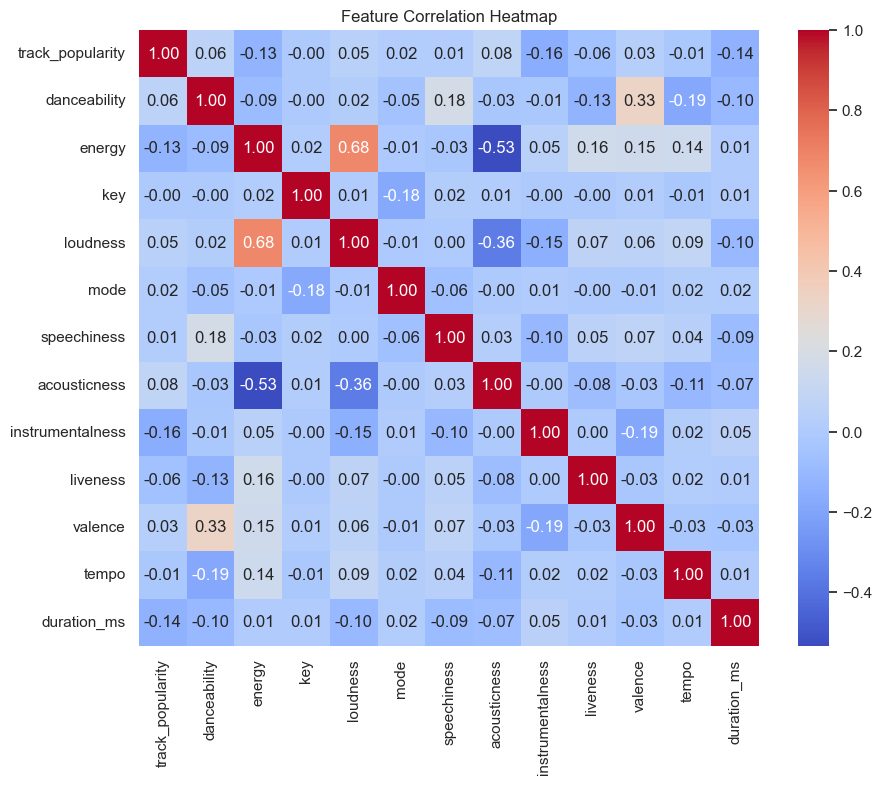

In [102]:
# Visualizing correlation with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [103]:
# Identifying categorical columns and apply one-hot encoding
# categorical_cols = spotify_data_cleaned.select_dtypes(include=['object']).columns
# spotify_data_encoded = pd.get_dummies(spotify_data_cleaned, columns=categorical_cols, drop_first=True)


# Using Random Forest to get feature importance
# X = spotify_data_encoded.drop(columns=['track_popularity'])
# y = spotify_data_encoded['track_popularity']
# model = RandomForestRegressor(random_state=42)
# model.fit(X, y)

# Feature importance
# feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
# print("Feature Importances:\n", feature_importances)

# Ploting feature importances with help of bar chart
# plt.figure(figsize=(10, 6))
# feature_importances.plot(kind='bar')
# plt.title("Feature Importances for Track Popularity Prediction")
# plt.show()

# Creating a Baseline

In [104]:
# Split data into training and testing sets
train_df, test_df = train_test_split(balanced_df, test_size=0.2, random_state=42)

# Calculate mean popularity per artist from training data only
artist_avg_popularity = train_df.groupby('track_artist')['track_popularity'].mean()

# For artists in test set not seen in training, use overall training mean
overall_mean = train_df['track_popularity'].mean()

# Create baseline predictions for test set
baseline_predictions = test_df['track_artist'].map(artist_avg_popularity)
baseline_predictions = baseline_predictions.fillna(overall_mean)

# Calculate baseline RMSE
baseline_rmse = np.sqrt(mean_squared_error(test_df['track_popularity'], baseline_predictions))
print(f"Baseline RMSE: {baseline_rmse:.2f}")

Baseline RMSE: 22.87


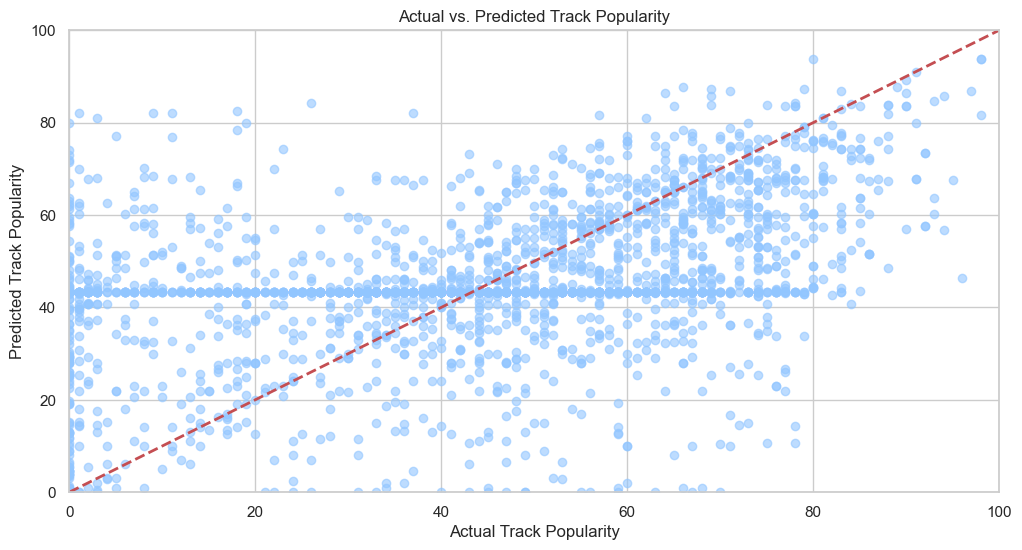

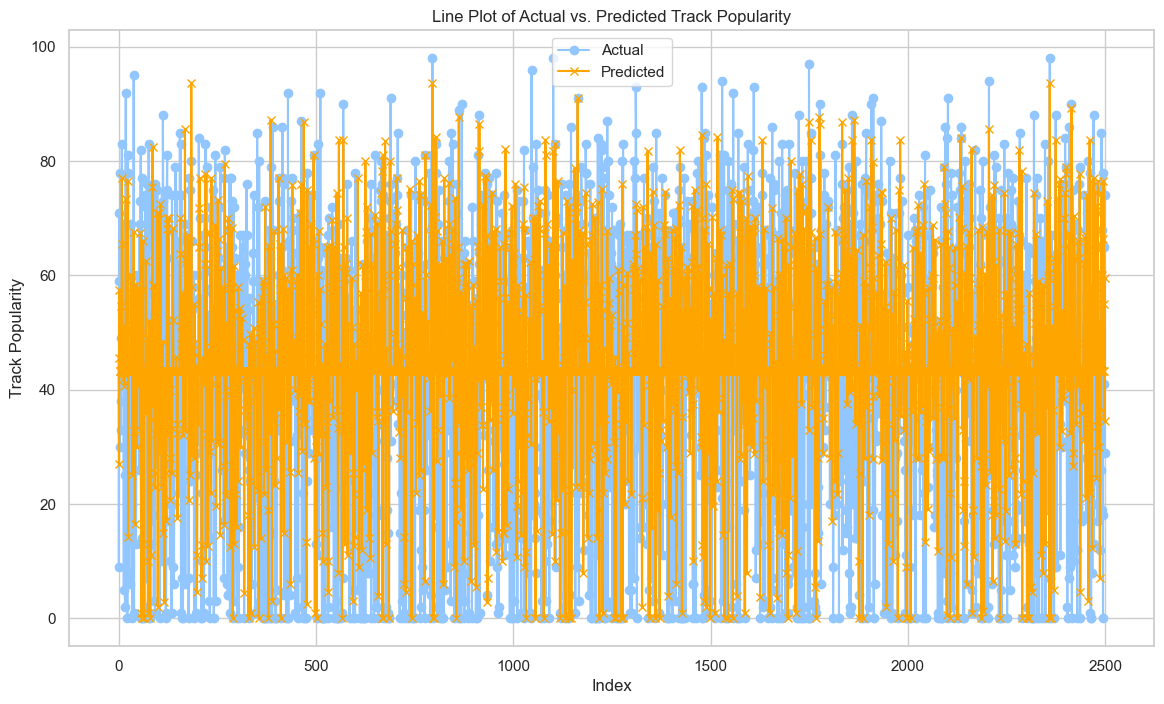

In [105]:
# Scatter Plot of Actual vs. Predicted values
plt.figure(figsize=(12, 6))
plt.scatter(test_df['track_popularity'], baseline_predictions, alpha=0.6)
plt.plot([0, 100], [0, 100], '--r', linewidth=2)  # Diagonal line for reference
plt.title('Actual vs. Predicted Track Popularity')
plt.xlabel('Actual Track Popularity')
plt.ylabel('Predicted Track Popularity')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.grid(True)
plt.show()

# Line Plot of Actual vs. Predicted values
plt.figure(figsize=(14, 8))
plt.plot(test_df['track_popularity'].values, label='Actual', marker='o')
plt.plot(baseline_predictions.values, label='Predicted', color='orange', marker='x')
plt.title('Line Plot of Actual vs. Predicted Track Popularity')
plt.xlabel('Index')
plt.ylabel('Track Popularity')
plt.legend()
plt.grid(True)
plt.show()

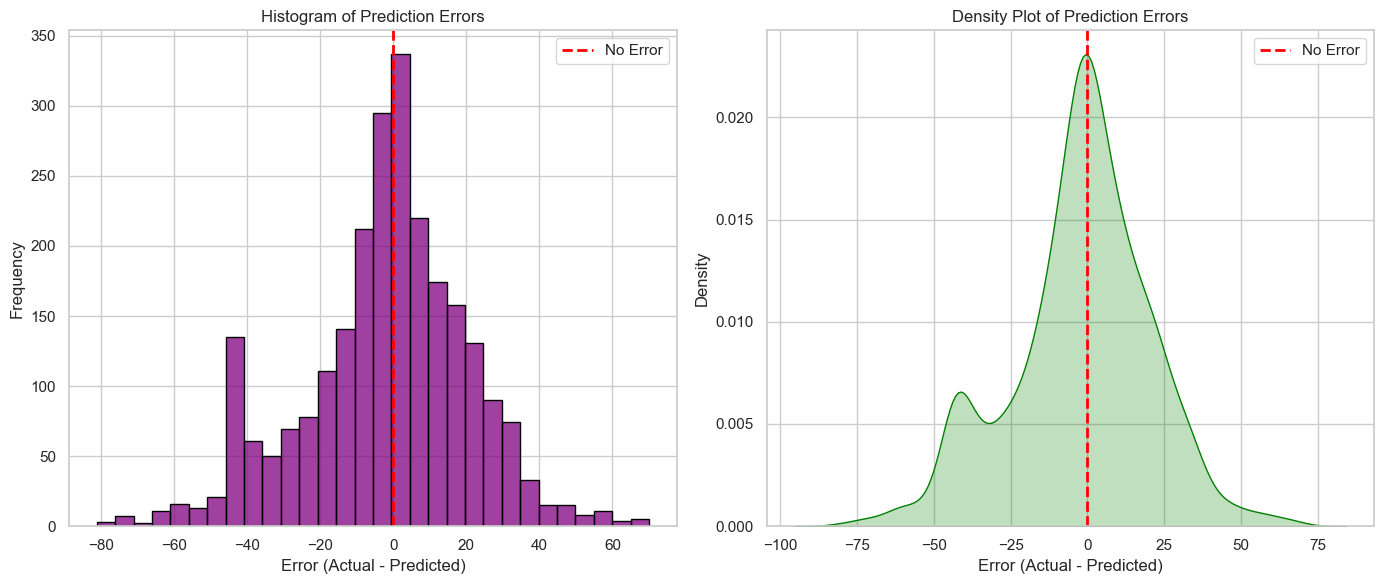

In [106]:
# Calculate prediction errors
errors = test_df['track_popularity'] - baseline_predictions

# Set plot style
sns.set(style="whitegrid")

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Histogram of Errors
plt.subplot(1, 2, 1)
sns.histplot(errors, bins=30, kde=False, color='purple', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='No Error')
plt.title('Histogram of Prediction Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.legend()

# Subplot 2: Density Plot of Errors
plt.subplot(1, 2, 2)
sns.kdeplot(errors, shade=True, color='green')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='No Error')
plt.title('Density Plot of Prediction Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Density')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Feature Selection and Preparation

In [107]:
# Split data into training and testing sets
train_df, test_df = train_test_split(balanced_df, test_size=0.2, random_state=42)

# First, create artist encoding using training data only to prevent data leakage
artist_popularity_mean = train_df.groupby('track_artist')['track_popularity'].mean()
artist_popularity_std = train_df.groupby('track_artist')['track_popularity'].std()

# Add artist features to train and test sets
train_df['artist_avg_popularity'] = train_df['track_artist'].map(artist_popularity_mean)
test_df['artist_avg_popularity'] = test_df['track_artist'].map(artist_popularity_mean)
train_df['artist_std_popularity'] = train_df['track_artist'].map(artist_popularity_std)
test_df['artist_std_popularity'] = test_df['track_artist'].map(artist_popularity_std)

# Fill NaN values (for artists not in training set) with global means
train_global_mean = train_df['track_popularity'].mean()
train_global_std = train_df['track_popularity'].std()
train_df['artist_avg_popularity'] = train_df['artist_avg_popularity'].fillna(train_global_mean)
test_df['artist_avg_popularity'] = test_df['artist_avg_popularity'].fillna(train_global_mean)
train_df['artist_std_popularity'] = train_df['artist_std_popularity'].fillna(train_global_std)
test_df['artist_std_popularity'] = test_df['artist_std_popularity'].fillna(train_global_std)

# Prepare features
audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'duration_ms'
]

# Convert release date to numeric feature
balanced_df['release_year'] = pd.to_datetime(balanced_df['track_album_release_date']).dt.year

# Combine features (without playlist_genre)
features = pd.concat([
    balanced_df[audio_features],
    balanced_df[['release_year']],
    pd.DataFrame({
        'artist_avg_popularity': balanced_df.index.map(lambda x: 
            train_df['artist_avg_popularity'][x] if x in train_df.index 
            else test_df['artist_avg_popularity'][x]),
        'artist_std_popularity': balanced_df.index.map(lambda x: 
            train_df['artist_std_popularity'][x] if x in train_df.index 
            else test_df['artist_std_popularity'][x])
    })
], axis=1)

# Split features and target
X_train = features.loc[train_df.index]
X_test = features.loc[test_df.index]
y_train = train_df['track_popularity']
y_test = test_df['track_popularity']

# Select top features
selector = SelectKBest(score_func=f_regression, k=15)  # reduced from 20 since we have fewer features
selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.get_support()].tolist()


# Keep only selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Selected Features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")
    

Selected Features:
1. danceability
2. energy
3. loudness
4. speechiness
5. acousticness
6. instrumentalness
7. liveness
8. valence
9. tempo
10. duration_ms
11. release_year
12. artist_avg_popularity
13. artist_std_popularity


In [108]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures


# Split data into training and testing sets
train_df, test_df = train_test_split(balanced_df, test_size=0.2, random_state=42)

# Compute artist statistics using training data only
artist_popularity_mean = train_df.groupby('track_artist')['track_popularity'].mean()
artist_popularity_std = train_df.groupby('track_artist')['track_popularity'].std()

# Add artist features to train and test sets
train_df['artist_avg_popularity'] = train_df['track_artist'].map(artist_popularity_mean)
test_df['artist_avg_popularity'] = test_df['track_artist'].map(artist_popularity_mean)

train_df['artist_std_popularity'] = train_df['track_artist'].map(artist_popularity_std)
test_df['artist_std_popularity'] = test_df['track_artist'].map(artist_popularity_std)

# Fill NaN values (for artists not in training set) with global means from the training data
train_global_mean = train_df['track_popularity'].mean()
train_global_std = train_df['track_popularity'].std()

train_df['artist_avg_popularity'].fillna(train_global_mean, inplace=True)
test_df['artist_avg_popularity'].fillna(train_global_mean, inplace=True)

train_df['artist_std_popularity'].fillna(train_global_std, inplace=True)
test_df['artist_std_popularity'].fillna(train_global_std, inplace=True)

audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'duration_ms'
]

# Convert release date to numeric feature (release year and song age)
train_df['release_year'] = pd.to_datetime(train_df['track_album_release_date']).dt.year
test_df['release_year'] = pd.to_datetime(test_df['track_album_release_date']).dt.year

# Compute song age (using 2024 as the reference year)
train_df['song_age'] = 2024 - train_df['release_year']
test_df['song_age'] = 2024 - test_df['release_year']

# Combine selected features (audio, temporal, and artist features)
features = audio_features + ['release_year', 'song_age', 'artist_avg_popularity', 'artist_std_popularity']

# Define feature matrix and target variable
X_train = train_df[features]
X_test = test_df[features]
y_train = train_df['track_popularity']
y_test = test_df['track_popularity']

# Use SelectKBest with mutual information regression to handle non-linear relationships
selector = SelectKBest(score_func=mutual_info_regression, k=15)
selector.fit(X_train, y_train)

# Extract selected features
selected_features = X_train.columns[selector.get_support()].tolist()

# Keep only selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Scaling the features and adding polynomial features for potential non-linear interactions
scaler = StandardScaler()

# Creating a pipeline that scales and adds polynomial features (if necessary)
pipeline = Pipeline([
    ('scaling', scaler),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),  # degree=2 for interaction terms
])

# Fit and transform training data, transform test data
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

# Output selected features
print("Selected Features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

Selected Features:
1. danceability
2. energy
3. loudness
4. speechiness
5. acousticness
6. instrumentalness
7. liveness
8. valence
9. tempo
10. duration_ms
11. release_year
12. song_age
13. artist_avg_popularity
14. artist_std_popularity


In [109]:
train_df['release_year'] = pd.to_datetime(train_df['track_album_release_date']).dt.year
test_df['release_year'] = pd.to_datetime(test_df['track_album_release_date']).dt.year

# Compute song age to capture how old a song is from the current year (2024)
train_df['song_age'] = 2024 - train_df['release_year']
test_df['song_age'] = 2024 - test_df['release_year']

# Extract decade to capture broader temporal trends
train_df['release_decade'] = (train_df['release_year'] // 10) * 10
test_df['release_decade'] = (test_df['release_year'] // 10) * 10

# Genre-Specific Features (if playlist genre is available)
# Assuming `playlist_genre` is a categorical column in your dataset
if 'playlist_genre' in balanced_df.columns:
    # One-Hot Encoding of `playlist_genre`
    genre_dummies_train = pd.get_dummies(train_df['playlist_genre'], prefix='genre')
    genre_dummies_test = pd.get_dummies(test_df['playlist_genre'], prefix='genre')
    
    # Align columns in train and test sets (in case of missing genres in one set)
    genre_dummies_train, genre_dummies_test = genre_dummies_train.align(genre_dummies_test, fill_value=0, axis=1)
    
    # Add to train and test DataFrames
    train_df = pd.concat([train_df, genre_dummies_train], axis=1)
    test_df = pd.concat([test_df, genre_dummies_test], axis=1)

# Interaction Terms (only if necessary and manageable)
# Adding interaction terms for potentially significant features
interaction_features = [
    'danceability', 'energy', 'loudness', 'artist_avg_popularity', 'song_age'
]
train_df['danceability_energy'] = train_df['danceability'] * train_df['energy']
test_df['danceability_energy'] = test_df['danceability'] * test_df['energy']

train_df['loudness_artist_pop'] = train_df['loudness'] * train_df['artist_avg_popularity']
test_df['loudness_artist_pop'] = test_df['loudness'] * test_df['artist_avg_popularity']

train_df['song_age_artist_pop'] = train_df['song_age'] * train_df['artist_avg_popularity']
test_df['song_age_artist_pop'] = test_df['song_age'] * test_df['artist_avg_popularity']

# Normalizing and Scaling Interactions (Optional: Only if needed)
# These interaction terms may need normalization before model training

# Define final feature set including engineered features
audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'duration_ms'
]

# Adding new features to the list
final_features = (
    audio_features +
    ['release_year', 'song_age', 'release_decade', 'artist_avg_popularity', 'artist_std_popularity',
     'danceability_energy', 'loudness_artist_pop', 'song_age_artist_pop']
)

# Adding genre-specific features if they exist
if 'playlist_genre' in balanced_df.columns:
    final_features += [col for col in train_df.columns if col.startswith('genre_')]

# Prepare feature matrices
X_train = train_df[final_features]
X_test = test_df[final_features]
y_train = train_df['track_popularity']
y_test = test_df['track_popularity']

# === FEATURE SELECTION ===
# Use SelectKBest with mutual information regression to handle non-linear relationships
selector = SelectKBest(score_func=mutual_info_regression, k=15)
selector.fit(X_train, y_train)

# Extract selected features
selected_features = X_train.columns[selector.get_support()].tolist()

# Keep only selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# === SCALING AND POLYNOMIAL FEATURES (OPTIONAL) ===
# Scaling the features and adding polynomial features for potential non-linear interactions
scaler = StandardScaler()

# Creating a pipeline that scales and adds polynomial features (if necessary)
pipeline = Pipeline([
    ('scaling', scaler),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),  # degree=2 for interaction terms
])

# Fit and transform training data, transform test data
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

# Output selected features
print("Selected Features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")


Selected Features:
1. danceability
2. energy
3. loudness
4. speechiness
5. acousticness
6. instrumentalness
7. tempo
8. duration_ms
9. release_year
10. song_age
11. artist_avg_popularity
12. artist_std_popularity
13. danceability_energy
14. loudness_artist_pop
15. song_age_artist_pop


# Linear Regression

In [110]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_train_pred = lr_model.predict(X_train_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)

# Calculate metrics
lr_train_rmse = np.sqrt(mean_squared_error(y_train, lr_train_pred))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_test_pred))
lr_test_r2 = r2_score(y_test, lr_test_pred)
lr_improvement = ((baseline_rmse - lr_test_rmse) / baseline_rmse) * 100

print("Linear Regression Results:")
print(f"Train RMSE: {lr_train_rmse:.2f}")
print(f"Test RMSE: {lr_test_rmse:.2f}")
print(f"Test R²: {lr_test_r2:.3f}")
print(f"Improvement over baseline: {lr_improvement:.1f}%")

Linear Regression Results:
Train RMSE: 14.70
Test RMSE: 22.36
Test R²: 0.198
Improvement over baseline: 2.2%


# Ridge Regression

In [111]:
from sklearn.linear_model import Ridge

# Train Ridge Regression
ridge_model = Ridge(alpha=1.0)  # you can tune alpha
ridge_model.fit(X_train_scaled, y_train)

# Make predictions
ridge_train_pred = ridge_model.predict(X_train_scaled)
ridge_test_pred = ridge_model.predict(X_test_scaled)

# Calculate metrics
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_train_pred))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_pred))
ridge_test_r2 = r2_score(y_test, ridge_test_pred)
ridge_improvement = ((baseline_rmse - ridge_test_rmse) / baseline_rmse) * 100

print("Ridge Regression Results:")
print(f"Train RMSE: {ridge_train_rmse:.2f}")
print(f"Test RMSE: {ridge_test_rmse:.2f}")
print(f"Test R²: {ridge_test_r2:.3f}")
print(f"Improvement over baseline: {ridge_improvement:.1f}%")

Ridge Regression Results:
Train RMSE: 14.69
Test RMSE: 22.34
Test R²: 0.199
Improvement over baseline: 2.3%


# Lasso Regression

In [112]:
from sklearn.linear_model import Lasso

# Train Lasso Regression
lasso_model = Lasso(alpha=1.0)  # you can tune alpha
lasso_model.fit(X_train_scaled, y_train)

# Make predictions
lasso_train_pred = lasso_model.predict(X_train_scaled)
lasso_test_pred = lasso_model.predict(X_test_scaled)

# Calculate metrics
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, lasso_train_pred))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_test_pred))
lasso_test_r2 = r2_score(y_test, lasso_test_pred)
lasso_improvement = ((baseline_rmse - lasso_test_rmse) / baseline_rmse) * 100

print("Lasso Regression Results:")
print(f"Train RMSE: {lasso_train_rmse:.2f}")
print(f"Test RMSE: {lasso_test_rmse:.2f}")
print(f"Test R²: {lasso_test_r2:.3f}")
print(f"Improvement over baseline: {lasso_improvement:.1f}%")

Lasso Regression Results:
Train RMSE: 14.93
Test RMSE: 22.60
Test R²: 0.180
Improvement over baseline: 1.2%


# Decision Tree

In [113]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)  # you can tune max_depth
dt_model.fit(X_train_scaled, y_train)

# Make predictions
dt_train_pred = dt_model.predict(X_train_scaled)
dt_test_pred = dt_model.predict(X_test_scaled)

# Calculate metrics
dt_train_rmse = np.sqrt(mean_squared_error(y_train, dt_train_pred))
dt_test_rmse = np.sqrt(mean_squared_error(y_test, dt_test_pred))
dt_test_r2 = r2_score(y_test, dt_test_pred)
dt_improvement = ((baseline_rmse - dt_test_rmse) / baseline_rmse) * 100

print("Decision Tree Results:")
print(f"Train RMSE: {dt_train_rmse:.2f}")
print(f"Test RMSE: {dt_test_rmse:.2f}")
print(f"Test R²: {dt_test_r2:.3f}")
print(f"Improvement over baseline: {dt_improvement:.1f}%")

# Feature importance
dt_feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': dt_model.feature_importances_
})
print("\nTop 10 Most Important Features (Decision Tree):")
print(dt_feature_importance.sort_values('importance', ascending=False).head(10))

Decision Tree Results:
Train RMSE: 10.20
Test RMSE: 22.88
Test R²: 0.160
Improvement over baseline: -0.0%


ValueError: All arrays must be of the same length

# Random Forest

In [114]:
# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_train_pred = rf_model.predict(X_train_scaled)
rf_test_pred = rf_model.predict(X_test_scaled)

# Calculate metrics
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))
rf_test_r2 = r2_score(y_test, rf_test_pred)
rf_improvement = ((baseline_rmse - rf_test_rmse) / baseline_rmse) * 100

print("Random Forest Results:")
print(f"Train RMSE: {rf_train_rmse:.2f}")
print(f"Test RMSE: {rf_test_rmse:.2f}")
print(f"Test R²: {rf_test_r2:.3f}")
print(f"Improvement over baseline: {rf_improvement:.1f}%")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_model.feature_importances_
})
print("\nTop 10 Most Important Features:")
print(feature_importance.sort_values('importance', ascending=False).head(10))

Random Forest Results:
Train RMSE: 5.93
Test RMSE: 21.25
Test R²: 0.275
Improvement over baseline: 7.1%


ValueError: All arrays must be of the same length

# Support Vector Regressor

In [115]:
from sklearn.svm import SVR

# Train SVR (this might take some time)
svr_model = SVR(kernel='rbf', C=1.0)
svr_model.fit(X_train_scaled, y_train)

# Make predictions
svr_train_pred = svr_model.predict(X_train_scaled)
svr_test_pred = svr_model.predict(X_test_scaled)

# Calculate metrics
svr_train_rmse = np.sqrt(mean_squared_error(y_train, svr_train_pred))
svr_test_rmse = np.sqrt(mean_squared_error(y_test, svr_test_pred))
svr_test_r2 = r2_score(y_test, svr_test_pred)
svr_improvement = ((baseline_rmse - svr_test_rmse) / baseline_rmse) * 100

print("Support Vector Regressor Results:")
print(f"Train RMSE: {svr_train_rmse:.2f}")
print(f"Test RMSE: {svr_test_rmse:.2f}")
print(f"Test R²: {svr_test_r2:.3f}")
print(f"Improvement over baseline: {svr_improvement:.1f}%")

Support Vector Regressor Results:
Train RMSE: 15.72
Test RMSE: 22.23
Test R²: 0.207
Improvement over baseline: 2.8%


# XGBoost

In [116]:
# Train XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
xgb_train_pred = xgb_model.predict(X_train_scaled)
xgb_test_pred = xgb_model.predict(X_test_scaled)

# Calculate metrics
xgb_train_rmse = np.sqrt(mean_squared_error(y_train, xgb_train_pred))
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_pred))
xgb_test_r2 = r2_score(y_test, xgb_test_pred)
xgb_improvement = ((baseline_rmse - xgb_test_rmse) / baseline_rmse) * 100

print("XGBoost Results:")
print(f"Train RMSE: {xgb_train_rmse:.2f}")
print(f"Test RMSE: {xgb_test_rmse:.2f}")
print(f"Test R²: {xgb_test_r2:.3f}")
print(f"Improvement over baseline: {xgb_improvement:.1f}%")

XGBoost Results:
Train RMSE: 5.22
Test RMSE: 21.84
Test R²: 0.235
Improvement over baseline: 4.5%


# LightGBM

In [117]:
import lightgbm as lgb

# Train LightGBM
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train_scaled, y_train)

# Make predictions
lgb_train_pred = lgb_model.predict(X_train_scaled)
lgb_test_pred = lgb_model.predict(X_test_scaled)

# Calculate metrics
lgb_train_rmse = np.sqrt(mean_squared_error(y_train, lgb_train_pred))
lgb_test_rmse = np.sqrt(mean_squared_error(y_test, lgb_test_pred))
lgb_test_r2 = r2_score(y_test, lgb_test_pred)
lgb_improvement = ((baseline_rmse - lgb_test_rmse) / baseline_rmse) * 100

print("LightGBM Results:")
print(f"Train RMSE: {lgb_train_rmse:.2f}")
print(f"Test RMSE: {lgb_test_rmse:.2f}")
print(f"Test R²: {lgb_test_r2:.3f}")
print(f"Improvement over baseline: {lgb_improvement:.1f}%")

# Feature importance
lgb_feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': lgb_model.feature_importances_
})
print("\nTop 10 Most Important Features (LightGBM):")
print(lgb_feature_importance.sort_values('importance', ascending=False).head(10))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33442
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 135
[LightGBM] [Info] Start training from score 43.320300
LightGBM Results:
Train RMSE: 9.62
Test RMSE: 21.72
Test R²: 0.243
Improvement over baseline: 5.0%


ValueError: All arrays must be of the same length

# MultiLayer Perceptron

In [118]:
from sklearn.neural_network import MLPRegressor

# Train MLP
mlp_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),  # two hidden layers
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)
mlp_model.fit(X_train_scaled, y_train)

# Make predictions
mlp_train_pred = mlp_model.predict(X_train_scaled)
mlp_test_pred = mlp_model.predict(X_test_scaled)

# Calculate metrics
mlp_train_rmse = np.sqrt(mean_squared_error(y_train, mlp_train_pred))
mlp_test_rmse = np.sqrt(mean_squared_error(y_test, mlp_test_pred))
mlp_test_r2 = r2_score(y_test, mlp_test_pred)
mlp_improvement = ((baseline_rmse - mlp_test_rmse) / baseline_rmse) * 100

print("MultiLayer Perceptron Results:")
print(f"Train RMSE: {mlp_train_rmse:.2f}")
print(f"Test RMSE: {mlp_test_rmse:.2f}")
print(f"Test R²: {mlp_test_r2:.3f}")
print(f"Improvement over baseline: {mlp_improvement:.1f}%")

MultiLayer Perceptron Results:
Train RMSE: 14.04
Test RMSE: 22.32
Test R²: 0.200
Improvement over baseline: 2.4%


# Comparing all Models

In [119]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Baseline', 'Linear Regression', 'Ridge', 'Lasso', 
              'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 
              'LightGBM', 'MLP'],
    'Test RMSE': [baseline_rmse, lr_test_rmse, ridge_test_rmse, 
                  lasso_test_rmse, dt_test_rmse, rf_test_rmse, 
                  svr_test_rmse, xgb_test_rmse, lgb_test_rmse, 
                  mlp_test_rmse],
    'Test R²': [0, lr_test_r2, ridge_test_r2, lasso_test_r2, 
                dt_test_r2, rf_test_r2, svr_test_r2, xgb_test_r2, 
                lgb_test_r2, mlp_test_r2],
    'Improvement': [0, lr_improvement, ridge_improvement, 
                   lasso_improvement, dt_improvement, rf_improvement, 
                   svr_improvement, xgb_improvement, lgb_improvement, 
                   mlp_improvement]
})

print("Model Comparison:")
print(comparison_df.sort_values('Test RMSE').round(3))

Model Comparison:
               Model  Test RMSE  Test R²  Improvement
5      Random Forest     21.251    0.275        7.087
8           LightGBM     21.722    0.243        5.030
7            XGBoost     21.836    0.235        4.530
6                SVR     22.228    0.207        2.817
9                MLP     22.320    0.200        2.414
2              Ridge     22.337    0.199        2.340
1  Linear Regression     22.359    0.198        2.246
3              Lasso     22.602    0.180        1.184
0           Baseline     22.873    0.000        0.000
4      Decision Tree     22.879    0.160       -0.028
